In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from functions import *


Stabilizers:
    $$ IZZZZ $$
    $$ XXIXZ $$
    $$ ZZXXI $$
    $$ ZXZIX $$
    $$ (XIXZX) $$
    
Operators:
    $$ \overline{Z} = XXXII $$
    $$ \overline{X} = ZXXZZ = IYIYZ $$
    $$ \overline{Y} = -YIIZZ $$


In [2]:
stabilizers = ['IZZZZ', 'XXIXZ', 'ZZXXI', 'ZXZIX', 'XIXZX']
log_ZGate = 'XXXII'
log_XGate = 'ZXXZZ'
log_YGate = 'YIIZZ'
operators = [log_XGate, log_YGate, log_ZGate]



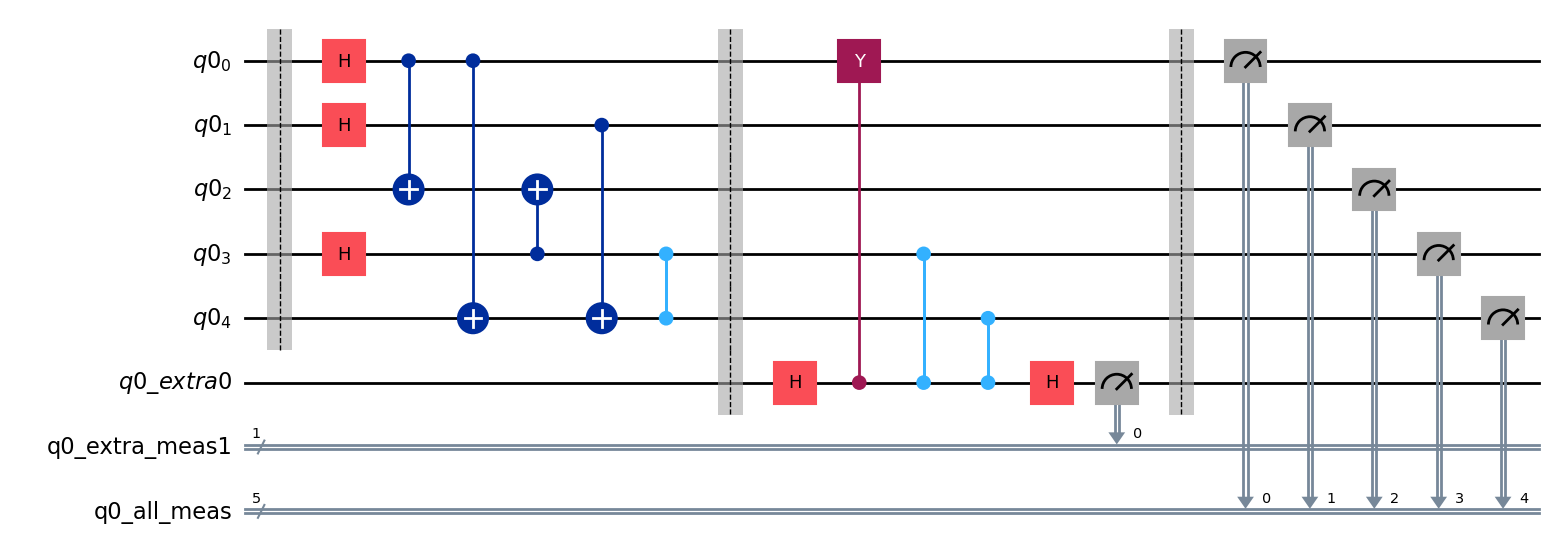

In [3]:

def load_circuit(operator):

    qc = FiveQbPerfectCodeCircuit(1)

    qc.encode(type='0')
    
    qc.measure_operator(operator=operator)
    
    qc.measure_all()

    return qc

qc = load_circuit(log_YGate)
qc.draw('mpl')



In [4]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_sherbrooke")

In [5]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 12
Transpiled Circuit Depth: 56


In [6]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [46]:

circuits = []


for s in stabilizers + operators:

    qc = load_circuit(s)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=100)
    circuits.append(isa_circuit)

    print(f"\nOperator: {s}")
    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=6))
    


Operator: IZZZZ
Circuit Depth: 63
Total Duration: 12.523 us

[114, 115, 109, 113, 116, 96]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: XXIXZ
Circuit Depth: 63
Total Duration: 12.466 us

[45, 46, 44, 54, 47, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: ZZXXI
Circuit Depth: 66
Total Duration: 12.58 us

[45, 44, 46, 54, 47, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: ZXZIX
Circuit Depth: 73
Total Duration: 14.293 us

[114, 115, 109, 113, 96, 116]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: XIXZX
Circuit Depth: 64
Total Duration: 12.466 us

[114, 115, 109, 113, 116, 117]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: ZXXZZ
Circuit Depth: 78
Total Duration: 14.884 us

[114, 115, 109, 113, 96, 116]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: YIIZZ
Circuit Depth: 50
Total Duration: 10.105 us

[45, 44, 46, 54, 43, 47]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")



Operator: XXXII
Circuit Depth: 63
Total Duration: 11.932 us

[45, 44, 46, 54, 47, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_15424\2605277549.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [5]:
for s in stabilizers + operators:
    simulation_result = sampler_simulation(load_circuit(s).physical_circuit, 500)

    print(s)

    for lq in qc.qubits:

        state = lq.extra_measures[0]
        
        print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")

        state = lq.all_measures
        print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")


IZZZZ
  q0_extra_meas1: {'0': 500}
  q0_all_meas: {'10101': 71, '11110': 47, '01100': 68, '01011': 79, '00000': 57, '10010': 56, '11001': 61, '00111': 61}
XXIXZ
  q0_extra_meas1: {'0': 500}
  q0_all_meas: {'10101': 60, '01011': 55, '01100': 66, '11001': 67, '00111': 58, '11110': 64, '00000': 65, '10010': 65}
ZZXXI
  q0_extra_meas1: {'0': 500}
  q0_all_meas: {'00000': 68, '01011': 64, '11110': 66, '10010': 62, '01100': 72, '11001': 51, '10101': 57, '00111': 60}
ZXZIX
  q0_extra_meas1: {'0': 500}
  q0_all_meas: {'00111': 62, '10010': 67, '10101': 56, '00000': 72, '01100': 71, '01011': 56, '11110': 57, '11001': 59}
XIXZX
  q0_extra_meas1: {'0': 500}
  q0_all_meas: {'10101': 69, '11110': 72, '00000': 63, '00111': 49, '01100': 58, '11001': 60, '10010': 56, '01011': 73}
ZXXZZ
  q0_extra_meas1: {'1': 249, '0': 251}
  q0_all_meas: {'10011': 23, '00001': 42, '10100': 37, '10101': 27, '00110': 38, '11000': 33, '01100': 31, '11111': 30, '11110': 28, '01101': 37, '10010': 28, '01010': 34, '01011':

In [7]:
sampler = SamplerV2(backend=backend)
shots = 3200

# job = sampler.run(circuits, shots=shots)
# job = service.job('cyvcmzk78z600082rq30') # sherbrooke, sin all_meas, shots=500
job = service.job('cyvcw9h4raf0008emewg') # shots=3200

pub_result = job.result()


In [8]:

for key, value in extract_results_IBM(pub_result, type='percentage', reverse_order=True).items():
    print(key, *value, sep='\n\t')


q0_extra_meas1
	{'0': 69.53125, '1': 30.46875}
	{'0': 50.0625, '1': 49.9375}
	{'0': 65.96875, '1': 34.03125}
	{'0': 53.90625, '1': 46.09375}
	{'0': 52.5, '1': 47.5}
	{'0': 46.625, '1': 53.37499999999999}
	{'0': 51.46875, '1': 48.53125}
	{'0': 66.21875, '1': 33.78125}
q0_all_meas
	{'00000': 5.28125, '00001': 0.8750000000000001, '00010': 1.03125, '00011': 0.6875, '00100': 1.21875, '00101': 0.28125, '00110': 8.6875, '00111': 2.40625, '01000': 1.15625, '01001': 2.0625, '01010': 0.96875, '01011': 1.4375, '01100': 0.59375, '01101': 0.6875, '01110': 3.4062500000000004, '01111': 13.4375, '10000': 1.8124999999999998, '10001': 3.6875, '10010': 3.5937499999999996, '10011': 8.1875, '10100': 1.03125, '10101': 5.28125, '10110': 3.0625, '10111': 3.4375000000000004, '11000': 1.5625, '11001': 1.0, '11010': 9.96875, '11011': 2.15625, '11100': 1.59375, '11101': 0.8125, '11110': 4.96875, '11111': 3.6249999999999996}
	{'00000': 7.21875, '00001': 1.25, '00010': 1.59375, '00011': 2.3125, '00100': 5.71875, '0

In [9]:
logical_meas_results, results = extract_results_IBM(pub_result, type='percentage', reverse_order=True).values()


In [52]:

states = [bin(i)[2:].zfill(5) for i in range(2**5)]


TVD (logic measurements)

In [54]:
for i in range(len(stabilizers)):
    print(stabilizers[i])
    print('\t', logical_meas_results[i])
    # print(f"\tTVD: {logical_meas_results[i]['1'] / shots*100}%")
for i in range(len(operators)):
    print(operators[i])
    print('\t', logical_meas_results[i+len(stabilizers)])
    

IZZZZ
	 {'0': 69.53125, '1': 30.46875}
XXIXZ
	 {'0': 50.0625, '1': 49.9375}
ZZXXI
	 {'0': 65.96875, '1': 34.03125}
ZXZIX
	 {'0': 53.90625, '1': 46.09375}
XIXZX
	 {'0': 52.5, '1': 47.5}
ZXXZZ
	 {'0': 46.625, '1': 53.37499999999999}
YIIZZ
	 {'0': 51.46875, '1': 48.53125}
XXXII
	 {'0': 66.21875, '1': 33.78125}


TVD (final state)

In [55]:

print(f" stabilizer", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(stabilizers)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {stabilizers[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 stabilizer	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 IZZZZ		 169	 28	 33	 22	 39	 9	 278	 77	 37	 66	 31	 46	 19	 22	 109	 430	 58	 118	 115	 262	 33	 169	 98	 110	 50	 32	 319	 69	 51	 26	 159	 116
 XXIXZ		 231	 40	 51	 74	 183	 40	 148	 69	 26	 214	 72	 57	 37	 176	 79	 61	 65	 50	 36	 239	 81	 53	 38	 226	 61	 74	 254	 64	 122	 46	 179	 54
 ZZXXI		 111	 79	 257	 35	 261	 52	 95	 61	 51	 153	 78	 96	 78	 85	 49	 184	 28	 66	 29	 124	 17	 116	 26	 68	 225	 62	 110	 109	 135	 103	 191	 66
 ZXZIX		 97	 84	 83	 196	 83	 49	 102	 178	 70	 76	 212	 92	 53	 70	 179	 98	 31	 106	 104	 57	 35	 54	 223	 133	 96	 34	 63	 96	 63	 20	 148	 215
 XIXZX		 150	 98	 139	 83	 149	 85	 142	 100	 130	 64	 78	 61	 130	 100	 118	 38	 74	 108	 8

In [56]:
valid_states = [s for s in states if sum([int(i) for i in s]) % 2 == 0]
alpha = generate_uniform_distribution(5, valid_states)

In [57]:
tvd = [calculate_tvd(r, alpha, percentage=True) for r in results]

print("stabilizer\tTVD")
print("------------------------")
for i in range(len(stabilizers)):

    print(f"{stabilizers[i]}\t\t", round(tvd[i],3))

stabilizer	TVD
------------------------
IZZZZ		 0.564
XXIXZ		 0.516
ZZXXI		 0.51
ZXZIX		 0.497
XIXZX		 0.512
